In [2]:
import hiive.mdptoolbox.mdp as mdp
import hiive.mdptoolbox.example as mdpex
import numpy as np
import time
import matplotlib.pyplot as plt
from statistics import mean
from scipy import sparse

In [2]:
#This site has statistics on fire probabilities
#https://firedanger.cr.usgs.gov/viewer/index.html
#The default p = 0.1 is actually a reasonable value for the probability of a large forest fire in any give year

In [3]:
np.random.seed(1)
T,R = mdpex.forest(S=10,r1=4,r2=2,p=0.1)

In [177]:
forest = mdp.PolicyIteration(T,R,0.1,eval_type=0)
forest.run()
policy = forest.policy
print(policy)

(0, 1, 1, 1, 1, 1, 1, 1, 1, 0)


In [178]:
forest = mdp.PolicyIteration(T,R,0.99,eval_type=0)
forest.run()
policy = forest.policy
print(policy)

(0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


In [176]:
forest = mdp.ValueIteration(T,R,0.1,epsilon=0.0001)
forest.run()
policy = forest.policy
print(policy)

(0, 1, 1, 1, 1, 1, 1, 1, 1, 0)


In [168]:
forest = mdp.ValueIteration(T,R,0.99)
forest.run()
policy = forest.policy
print(policy)

(0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


In [231]:
v0_pi = []
v0_vi = []
vmax_pi = []
vmax_vi = []
iters_pi = []
iters_vi = []
iters_opt_vi = []
times_pi = []
times_vi = []
same_policy = []

gammas = np.linspace(0.1,0.99)
for gamma in gammas:
    forest = mdp.PolicyIteration(T,R,gamma,eval_type=0)
    forest.run()
    v0_pi.append(forest.run_stats[-1].get('Mean V')/forest.run_stats[-1].get('Max V'))
    vmax_pi.append(forest.run_stats[-1].get('Max V'))
    iters_pi.append(forest.iter)
    times_pi.append(forest.time)
    policy = forest.policy
    
    forest = mdp.ValueIteration(T,R,gamma,epsilon=0.0001)
    forest.run()
    v0_vi.append(forest.run_stats[-1].get('Mean V')/forest.run_stats[-1].get('Max V'))
    vmax_vi.append(forest.run_stats[-1].get('Max V'))
    iters_vi.append(forest.iter)
    iters_opt_vi.append(forest.p_cumulative[-1][0])
    times_vi.append(forest.time)
    if forest.policy == policy:
        same_policy.append(True)
    else:
        same_policy.append(False)

In [227]:
same_policy

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [204]:
np.argmax(iters_vi)

42

In [211]:
forest = mdp.ValueIteration(T,R,gammas[42])
forest.run()
policy = forest.policy
print(policy)

(0, 1, 0, 0, 0, 0, 0, 0, 0, 0)


In [216]:
gammas[42]

0.8628571428571428

In [253]:
gammas[43]

0.8810204081632652

In [214]:
forest = mdp.ValueIteration(T,R,gammas[43])
forest.run()
policy = forest.policy
print(policy)

(0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


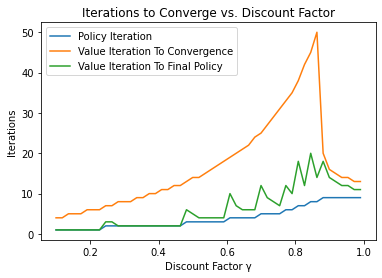

In [232]:
plt.plot(gammas,iters_pi,label="Policy Iteration")
plt.plot(gammas,iters_vi,label="Value Iteration To Convergence")
plt.plot(gammas,iters_opt_vi,label="Value Iteration To Final Policy")
plt.legend()
plt.title("Iterations to Converge vs. Discount Factor")
plt.xlabel("Discount Factor γ")
plt.ylabel("Iterations")
plt.savefig("Images/Forest10_gamma_iterations.png")
plt.show()

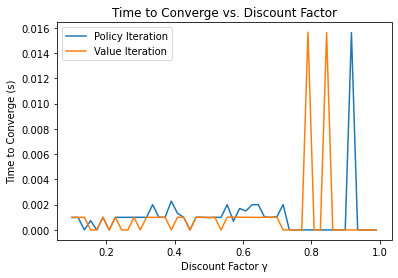

In [233]:
plt.plot(gammas,times_pi,label="Policy Iteration")
plt.plot(gammas,times_vi,label="Value Iteration")
plt.legend()
plt.title("Time to Converge vs. Discount Factor")
plt.xlabel("Discount Factor γ")
plt.ylabel("Time to Converge (s)")
plt.savefig("Images/Forest10_gamma_time.png")
plt.show()

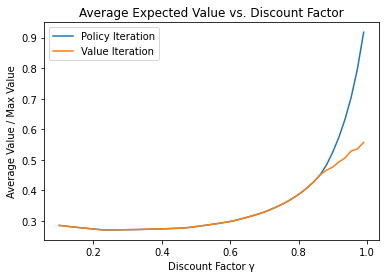

In [230]:
plt.plot(gammas,v0_pi,label="Policy Iteration")
plt.plot(gammas,v0_vi,label="Value Iteration")
plt.legend()
plt.title("Average Expected Value vs. Discount Factor")
plt.xlabel("Discount Factor γ")
plt.ylabel("Average Value / Max Value")
plt.savefig("Images/Forest10_gamma_averageVal.png")
plt.show()

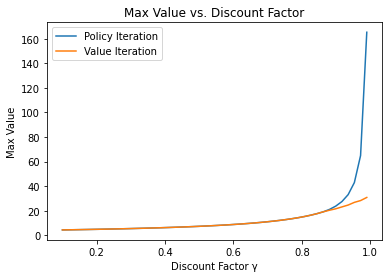

In [184]:
plt.plot(gammas,vmax_pi,label="Policy Iteration")
plt.plot(gammas,vmax_vi,label="Value Iteration")
plt.legend()
plt.title("Max Value vs. Discount Factor")
plt.xlabel("Discount Factor γ")
plt.ylabel("Max Value")
plt.savefig("Images/Forest10_gamma_maxVal.png")
plt.show()

In [223]:
v0_vi = []
vmax_vi = []
iters_vi = []
iters_opt_vi = []

epsilon = np.logspace(-5,3)
for ep in epsilon: 
    frzL = mdp.ValueIteration(T,R,0.99,epsilon=ep)
    frzL.run()
    v0_vi.append(frzL.run_stats[-1].get('Mean V')/frzL.run_stats[-1].get('Max V'))
    vmax_vi.append(frzL.run_stats[-1].get('Max V'))
    iters_vi.append(frzL.iter)
    iters_opt_vi.append(frzL.p_cumulative[-1][0])

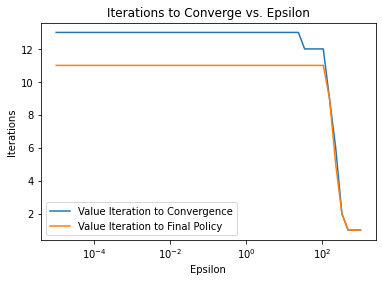

In [224]:
plt.plot(epsilon,iters_vi,label="Value Iteration to Convergence")
plt.plot(epsilon,iters_opt_vi,label="Value Iteration to Final Policy")
plt.legend()
plt.xscale('log')
plt.title("Iterations to Converge vs. Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Iterations")
plt.savefig("Images/Forest10_epsilon_iterations.png")
plt.show()

In [88]:
iters_opt_vi[40]
epsilon[40]

120.67926406393289

In [89]:
v0_vi_opt = []
vmax_vi_opt = []
iters_vi_opt = []
iters_opt_vi = []

epsilon = np.logspace(-2,3)
for ep in epsilon: 
    frzL = mdp.ValueIteration(T,R,0.99,epsilon=epsilon[40])
    frzL.run()
    v0_vi_opt.append(frzL.run_stats[-1].get('Mean V')/frzL.run_stats[-1].get('Max V'))
    vmax_vi_opt.append(frzL.run_stats[-1].get('Max V'))
    iters_vi_opt.append(frzL.iter)
    iters_opt_vi.append(frzL.p_cumulative[-1][0])

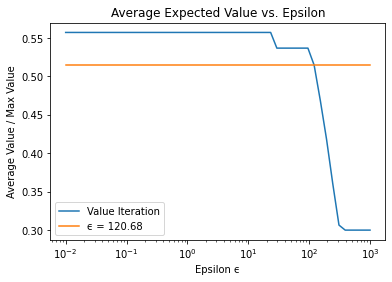

In [90]:
plt.plot(epsilon,v0_vi,label="Value Iteration")
plt.plot(epsilon,v0_vi_opt,label="ϵ = {epsilon:0.2f}".format(epsilon=epsilon[40]))
plt.legend()
plt.xscale('log')
plt.title("Average Expected Value vs. Epsilon")
plt.xlabel("Epsilon ϵ")
plt.ylabel("Average Value / Max Value")
plt.savefig("Images/Forest10_epsilon_averageVal.png")
plt.show()

In [6]:
#Q-learning time!

forest = mdp.QLearning(T,R,0.9,n_iter=1000000)
t0 = time.perf_counter()
forest.run()
t1 = time.perf_counter()
v0_ql_iter = []
vmax_ql_iter = []
for i in range(0,len(forest.run_stats)):
    v0_ql_iter.append(forest.run_stats[i].get('Mean V')/forest.run_stats[i].get('Max V'))
    vmax_ql_iter.append(forest.run_stats[i].get('Max V'))

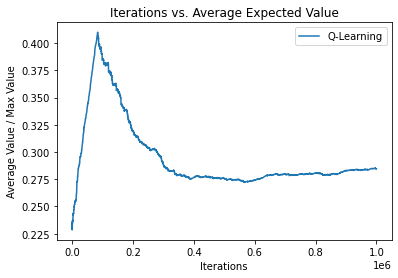

In [5]:
plt.plot(range(1,1000001,int(1000000/10000)),v0_ql_iter,label="Q-Learning")
plt.legend()
plt.title("Iterations vs. Average Expected Value")
plt.xlabel("Iterations")
plt.ylabel("Average Value / Max Value")
plt.savefig("Images/Forest10_iterations_value_ql.png")
plt.show()

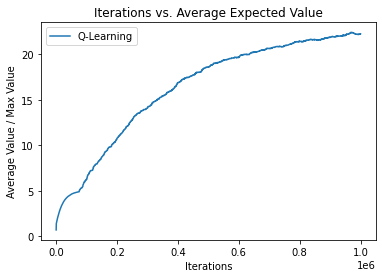

In [7]:
plt.plot(range(1,1000001,int(1000000/10000)),vmax_ql_iter,label="Q-Learning")
plt.legend()
plt.title("Iterations vs. Average Expected Value")
plt.xlabel("Iterations")
plt.ylabel("Average Value / Max Value")
plt.savefig("Images/Forest10_iterations_max_value_ql.png")
plt.show()

In [ ]:
v0_ql = []
vmax_ql = []
times_ql = []
iters_ql = []

gammas = np.linspace(0.8,0.99)
for gamma in gammas:
    forest = mdp.QLearning(T,R,gamma,n_iter=1000000)
    t0 = time.perf_counter()
    forest.run()
    t1 = time.perf_counter()
    v0_ql_iter = []
    for i in range(0,len(forest.run_stats)):
        v0_ql_iter.append(forest.run_stats[i].get('Mean V')/forest.run_stats[i].get('Max V'))
    best = np.argmax(v0_ql_iter)
    v0_ql.append(forest.run_stats[-1].get('Mean V')/forest.run_stats[-1].get('Max V'))
    vmax_ql.append(forest.run_stats[-1].get('Max V'))
    iters_ql.append(forest.run_stats[best].get('Iteration'))
    times_ql.append(forest.run_stats[-1].get('Time'))  

In [ ]:
plt.plot(gammas,iters_ql,label="Q-Learning")
plt.legend()
plt.title("Iterations to Best vs. Discount Factor")
plt.xlabel("Discount Factor γ")
plt.ylabel("Iterations")
plt.savefig("Images/Forest10_gamma_iterations_ql.png")
plt.show()

In [ ]:
plt.plot(gammas,times_ql,label="Q-Learning")
plt.legend()
plt.title("Time to Best vs. Discount Factor")
plt.xlabel("Discount Factor γ")
plt.ylabel("Time to Converge (s)")
plt.savefig("Images/Forest10_gamma_time_ql.png")
plt.show()

In [ ]:
plt.plot(gammas,v0_ql,label="Q-Learning")
plt.legend()
plt.title("Average Expected Value vs. Discount Factor")
plt.xlabel("Discount Factor γ")
plt.ylabel("Average Value / Max Value")
plt.savefig("Images/Forest10_gamma_averageVal_ql.png")
plt.show()

In [ ]:
plt.plot(gammas,vmax_ql,label="Q-Learning")
plt.legend()
plt.title("Max Value vs. Discount Factor")
plt.xlabel("Discount Factor γ")
plt.ylabel("Max Value")
plt.savefig("Images/Forest10_gamma_maxVal_ql.png")
plt.show()

In [103]:
v0_ql = []
vmax_ql = []
times_ql = []
iters_ql = []

epsilon = np.logspace(-7,1)
for ep in epsilon:
    forest = mdp.QLearning(T,R,0.99,epsilon=ep,n_iter=1000000)
    t0 = time.perf_counter()
    forest.run()
    t1 = time.perf_counter()
    v0_ql_iter = []
    for i in range(0,len(forest.run_stats)):
        v0_ql_iter.append(forest.run_stats[i].get('Mean V')/forest.run_stats[i].get('Max V'))
    best = np.argmax(v0_ql_iter)
    v0_ql.append(forest.run_stats[best].get('Mean V')/forest.run_stats[best].get('Max V'))
    vmax_ql.append(forest.run_stats[best].get('Max V'))
    iters_ql.append(forest.run_stats[best].get('Iteration'))
    times_ql.append(forest.run_stats[best].get('Time'))  

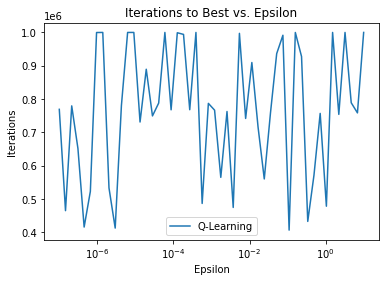

In [105]:
plt.plot(epsilon,iters_ql,label="Q-Learning")
plt.legend()
plt.xscale('log')
plt.title("Iterations to Best vs. Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Iterations")
plt.savefig("Images/Forest10_epsilon_iterations_ql.png")
plt.show()

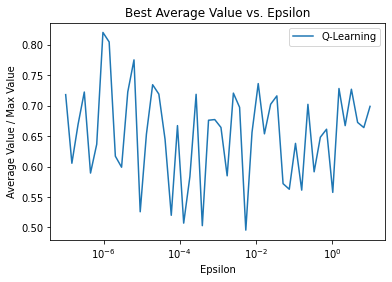

In [106]:
plt.plot(epsilon,v0_ql,label="Q-Learning")
plt.legend()
plt.xscale('log')
plt.title("Best Average Value vs. Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Average Value / Max Value")
plt.savefig("Images/Forest10_epsilon_averageVal_ql.png")
plt.show()

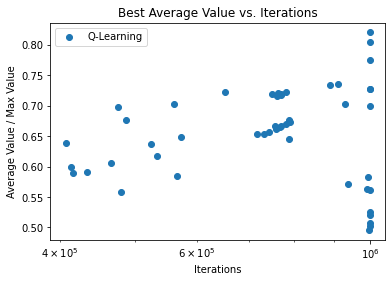

In [109]:
plt.scatter(iters_ql,v0_ql,label="Q-Learning")
plt.legend()
plt.xscale('log')
plt.title("Best Average Value vs. Iterations")
plt.xlabel("Iterations")
plt.ylabel("Average Value / Max Value")
plt.savefig("Images/Forest10_iters_averageVal_varyEpsilon_ql.png")
plt.show()

In [257]:
np.random.seed(1)
T,R = mdpex.forest(S=5000,r1=4,r2=2,p=0.1,is_sparse=True)

In [236]:
v0_pi = []
v0_vi = []
vmax_pi = []
vmax_vi = []
iters_pi = []
iters_vi = []
iters_opt_vi = []
times_pi = []
times_vi = []
same_policy = []

gammas = np.linspace(0.1,0.99)
for gamma in gammas:
    forest = mdp.PolicyIteration(T,R,gamma,eval_type=0)
    forest.run()
    v0_pi.append(forest.run_stats[-1].get('Mean V')/forest.run_stats[-1].get('Max V'))
    vmax_pi.append(forest.run_stats[-1].get('Max V'))
    iters_pi.append(forest.iter)
    times_pi.append(forest.time)
    policy = forest.policy
    
    forest = mdp.ValueIteration(T,R,gamma,epsilon=0.0001)
    forest.run()
    v0_vi.append(forest.run_stats[-1].get('Mean V')/forest.run_stats[-1].get('Max V'))
    vmax_vi.append(forest.run_stats[-1].get('Max V'))
    iters_vi.append(forest.iter)
    iters_opt_vi.append(forest.p_cumulative[-1][0])
    times_vi.append(forest.time)
    if forest.policy == policy:
        same_policy.append(True)
    else:
        same_policy.append(False)

In [237]:
same_policy

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

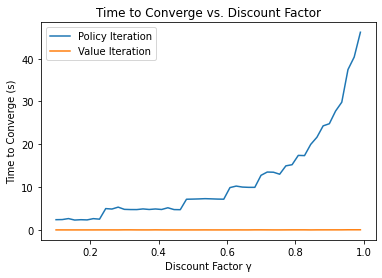

In [238]:
plt.plot(gammas,times_pi,label="Policy Iteration")
plt.plot(gammas,times_vi,label="Value Iteration")
plt.legend()
plt.title("Time to Converge vs. Discount Factor")
plt.xlabel("Discount Factor γ")
plt.ylabel("Time to Converge (s)")
plt.savefig("Images/Forest5000_gamma_time.png")
plt.show()

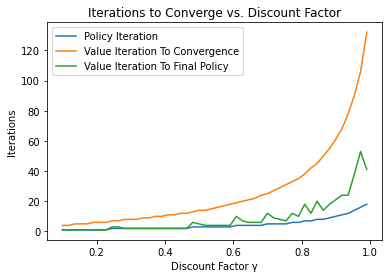

In [239]:
plt.plot(gammas,iters_pi,label="Policy Iteration")
plt.plot(gammas,iters_vi,label="Value Iteration To Convergence")
plt.plot(gammas,iters_opt_vi,label="Value Iteration To Final Policy")
plt.legend()
plt.title("Iterations to Converge vs. Discount Factor")
plt.xlabel("Discount Factor γ")
plt.ylabel("Iterations")
plt.savefig("Images/Forest5000_gamma_iterations.png")
plt.show()

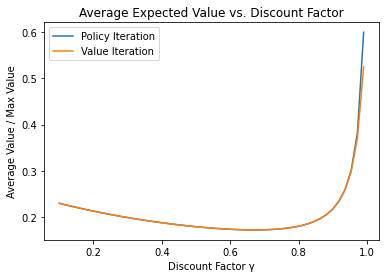

In [240]:
plt.plot(gammas,v0_pi,label="Policy Iteration")
plt.plot(gammas,v0_vi,label="Value Iteration")
plt.legend()
plt.title("Average Expected Value vs. Discount Factor")
plt.xlabel("Discount Factor γ")
plt.ylabel("Average Value / Max Value")
plt.savefig("Images/Forest5000_gamma_averageVal.png")
plt.show()

In [242]:
np.argmin(v0_pi)

31

In [261]:
#The code below was running at some point, but I think my computer got mad at me because of memory issues or something

In [260]:
forest = mdp.PolicyIteration(T,R,gammas[-1],eval_type=0)
forest.run()
#print(forest.policy)

MemoryError: Unable to allocate 191. MiB for an array with shape (5000, 5000) and data type float64

In [248]:
forest = mdp.PolicyIteration(T,R,gammas[31],eval_type=0)
forest.run()
print(forest.policy)

(0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [252]:
gammas[31]

0.6630612244897959

In [249]:
forest = mdp.PolicyIteration(T,R,gammas[32],eval_type=0)
forest.run()
print(forest.policy)

(0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [259]:
forest = mdp.PolicyIteration(T,R,0.1,eval_type=0)
forest.run()
print(forest.policy)

MemoryError: Unable to allocate 191. MiB for an array with shape (5000, 5000) and data type float64

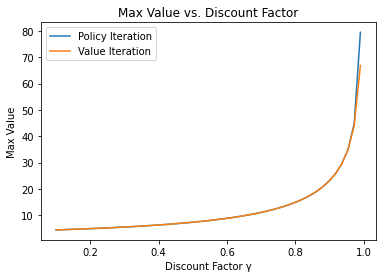

In [241]:
plt.plot(gammas,vmax_pi,label="Policy Iteration")
plt.plot(gammas,vmax_vi,label="Value Iteration")
plt.legend()
plt.title("Max Value vs. Discount Factor")
plt.xlabel("Discount Factor γ")
plt.ylabel("Max Value")
plt.savefig("Images/Forest5000_gamma_maxVal.png")
plt.show()

In [44]:
v0_vi = []
vmax_vi = []
iters_vi = []
iters_opt_vi = []

#I guess I forgot to change frzL to forest, but the T and R are the forest T and R
epsilon = np.logspace(-7,3)
for ep in epsilon: 
    frzL = mdp.ValueIteration(T,R,0.99,epsilon=ep)
    frzL.run()
    v0_vi.append(frzL.run_stats[-1].get('Mean V')/frzL.run_stats[-1].get('Max V'))
    vmax_vi.append(frzL.run_stats[-1].get('Max V'))
    iters_vi.append(frzL.iter)
    iters_opt_vi.append(frzL.p_cumulative[-1][0])

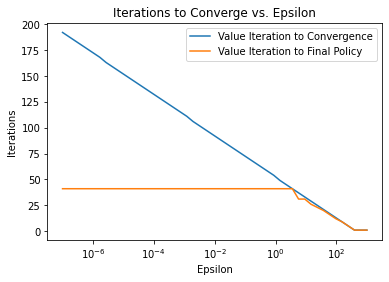

In [34]:
plt.plot(epsilon,iters_vi,label="Value Iteration to Convergence")
plt.plot(epsilon,iters_opt_vi,label="Value Iteration to Final Policy")
plt.legend()
plt.xscale('log')
plt.title("Iterations to Converge vs. Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Iterations")
plt.savefig("Images/Forest5000_epsilon_iterations.png")
plt.show()

In [41]:
iters_opt_vi[37]
epsilon[37]

3.5564803062231287

In [45]:
v0_vi_opt = []
vmax_vi_opt = []
iters_vi_opt = []
iters_opt_vi = []

epsilon = np.logspace(-7,3)
for ep in epsilon: 
    frzL = mdp.ValueIteration(T,R,0.99,epsilon=epsilon[37])
    frzL.run()
    v0_vi_opt.append(frzL.run_stats[-1].get('Mean V')/frzL.run_stats[-1].get('Max V'))
    vmax_vi_opt.append(frzL.run_stats[-1].get('Max V'))
    iters_vi_opt.append(frzL.iter)
    iters_opt_vi.append(frzL.p_cumulative[-1][0])

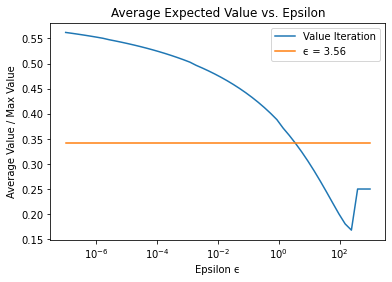

In [46]:
plt.plot(epsilon,v0_vi,label="Value Iteration")
plt.plot(epsilon,v0_vi_opt,label="ϵ = {epsilon:0.2f}".format(epsilon=epsilon[37]))
plt.legend()
plt.xscale('log')
plt.title("Average Expected Value vs. Epsilon")
plt.xlabel("Epsilon ϵ")
plt.ylabel("Average Value / Max Value")
plt.savefig("Images/Forest5000_epsilon_averageVal.png")
plt.show()

In [115]:
#Q-learning time!

forest = mdp.QLearning(T,R,0.99,n_iter=100000)
t0 = time.perf_counter()
forest.run()
t1 = time.perf_counter()
v0_ql_iter = []
for i in range(0,len(forest.run_stats)):
    v0_ql_iter.append(forest.run_stats[i].get('Mean V')/forest.run_stats[i].get('Max V'))

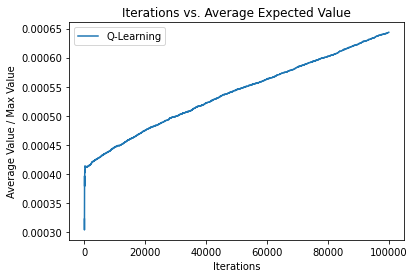

In [116]:
plt.plot(range(1,100001,int(100000/10000)),v0_ql_iter,label="Q-Learning")
plt.legend()
plt.title("Iterations vs. Average Expected Value")
plt.xlabel("Iterations")
plt.ylabel("Average Value / Max Value")
plt.savefig("Images/Forest5000_iterations_value_ql.png")
plt.show()

In [117]:
v0_ql = []
vmax_ql = []
times_ql = []
iters_ql = []

gammas = np.linspace(0.8,0.99)
for gamma in gammas:
    forest = mdp.QLearning(T,R,gamma,n_iter=1000000)
    t0 = time.perf_counter()
    forest.run()
    t1 = time.perf_counter()
    v0_ql_iter = []
    for i in range(0,len(forest.run_stats)):
        v0_ql_iter.append(forest.run_stats[i].get('Mean V')/forest.run_stats[i].get('Max V'))
    best = np.argmax(v0_ql_iter)
    v0_ql.append(forest.run_stats[best].get('Mean V')/forest.run_stats[best].get('Max V'))
    vmax_ql.append(forest.run_stats[best].get('Max V'))
    iters_ql.append(forest.run_stats[best].get('Iteration'))
    times_ql.append(forest.run_stats[best].get('Time'))  

KeyboardInterrupt: 

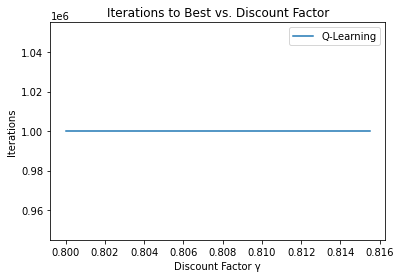

In [119]:
plt.plot(gammas[:5],iters_ql,label="Q-Learning")
plt.legend()
plt.title("Iterations to Best vs. Discount Factor")
plt.xlabel("Discount Factor γ")
plt.ylabel("Iterations")
plt.savefig("Images/Forest5000_gamma_iterations_ql.png")
plt.show()

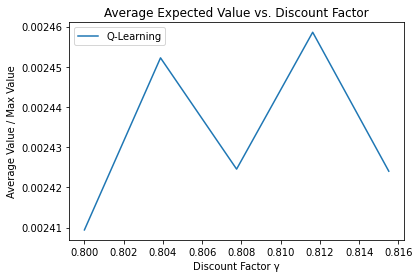

In [120]:
plt.plot(gammas[:5],v0_ql,label="Q-Learning")
plt.legend()
plt.title("Average Expected Value vs. Discount Factor")
plt.xlabel("Discount Factor γ")
plt.ylabel("Average Value / Max Value")
plt.savefig("Images/Forest5000_gamma_averageVal_ql.png")
plt.show()